Testing the reading of CPOL Lassen and Rapic and Berrimah Rapic

In [1]:
import pyart
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119 


In [2]:
lassen_file = '/data/cmdv_sample_files/Gunn_pt_20060120235001_PPI.lassen' 

#change for Blues

cpol_rapic_file = '/data/cmdv_sample_files/201101281320Gunn_Pt.rapic'
berrimah_rapic_file = '/data/cmdv_sample_files/201001311840Berrima.rapic'

Lassen First.. Lassen is an old file format and we read with RSL

In [3]:
cpol_old = pyart.io.read_rsl(lassen_file)

In [4]:
print(cpol_old.metadata)

{'country': b'', 'Conventions': 'CF/Radial instrument_parameters', 'instrument_name': b'Gunn_Pt', 'version': '1.3', 'title': '', 'source': '', 'references': '', 'history': '', 'comment': '', 'state': b'AU', 'institution': '', 'original_container': 'rsl', 'project': b''}


Not too good.. will need to add a lot of metadata

In [5]:
print(cpol_old.instrument_parameters.keys())
print(cpol_old.instrument_parameters['nyquist_velocity'])

dict_keys(['unambiguous_range', 'nyquist_velocity', 'prt_mode', 'radar_beam_width_h', 'prt', 'radar_beam_width_v'])
{'data': array([ 13.35497379,  13.35497379,  13.35497379, ...,  13.35497379,
        13.35497379,  13.35497379], dtype=float32), 'units': 'meters_per_second', 'meta_group': 'instrument_parameters', 'comments': 'Unambiguous velocity', 'long_name': 'Nyquist velocity'}


A little better.. Lets make sure the data is intact.

In [6]:
print(cpol_old.fields.keys())

dict_keys(['differential_phase', 'velocity', 'reflectivity', 'differential_reflectivity', 'spectrum_width', 'cross_correlation_ratio'])


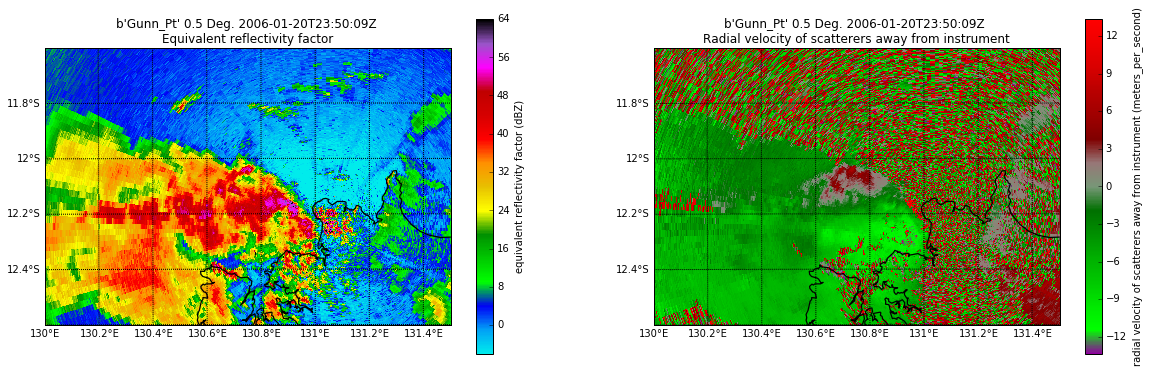

In [7]:
nyq = cpol_old.instrument_parameters['nyquist_velocity']['data'][0]
max_lat = -11.6
min_lat =-12.6
min_lon = 130
max_lon = 131.5

lat_lines = np.arange(min_lat, max_lat,.2)
lon_lines = np.arange(min_lon, max_lon, .2)

my_display = pyart.graph.RadarMapDisplay(cpol_old)
tilt = 0
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('reflectivity', tilt, vmin=-6, vmax=64.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.NWSRef)

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('velocity', tilt, vmin=-nyq, vmax=nyq, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.NWSVel)


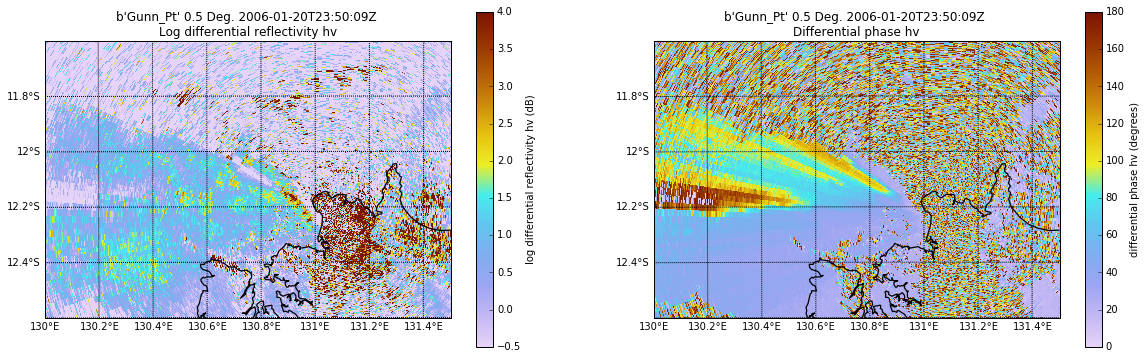

In [8]:
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('differential_reflectivity', tilt, 
                        vmin=-0.5, vmax=4.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.LangRainbow12)

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('differential_phase', tilt, 
                        vmin=0, vmax=180, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, 
                        max_lon = max_lon,
                       cmap = pyart.graph.cm.LangRainbow12)


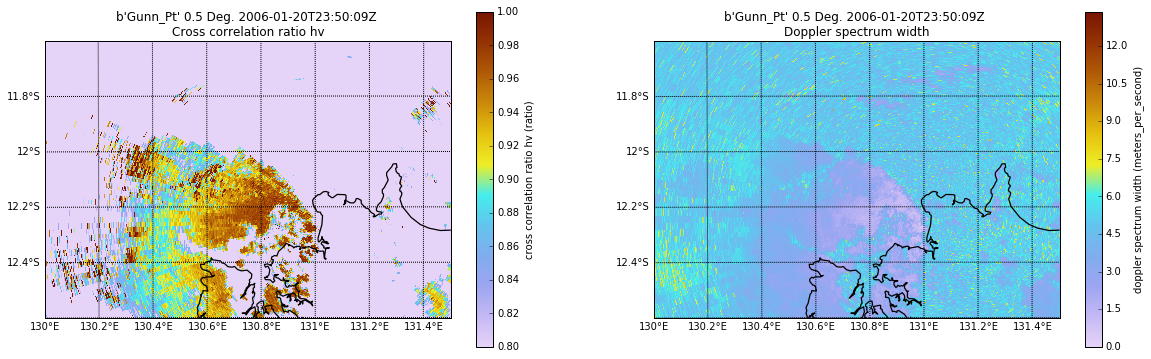

In [9]:
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('cross_correlation_ratio', tilt, 
                        vmin=0.80, vmax=1.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.LangRainbow12)

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('spectrum_width', tilt, 
                        vmin=0, vmax=nyq, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, 
                        max_lon = max_lon,
                       cmap = pyart.graph.cm.LangRainbow12)


Next! CPOL Rapic from newer files

In [10]:
help(pyart.aux_io.read_radx)

Help on function read_radx in module pyart.aux_io.radx:

read_radx(filename, radx_dir=None, **kwargs)
    Read a file by first converting it to Cf/Radial using RadxConvert.
    
    Parameters
    ----------
    filename : str
        Name of file to read using RadxConvert.
    
    radx_dir : str, optional
        path to the radx install
    
    Returns
    -------
    radar : Radar
        Radar object.



In [44]:
rad_dir = '/Users/scollis/src/radx-20160327.macosx_x64/bin/'
cpol_new = pyart.aux_io.read_radx(cpol_rapic_file, radx_dir = rad_dir)

In [45]:
print(cpol_new.fields.keys())
print(cpol_new.metadata)
print(cpol_new.instrument_parameters.keys())


dict_keys(['ZDR', 'PHIDP', 'RHOHV', 'Refl', 'Vel', 'Width'])
{'original_format': 'RAPIC', 'time_coverage_end': '2011-01-28T13:28:20Z', 'time_coverage_start': '2011-01-28T13:20:02Z', 'title': 'RAPIC VOLUME FROM AUSTRALIA BUREAU OF METEOROLOGY', 'platform_type': "b'fixed'", 'history': 'Rapic RAW file: ', 'n_gates_vary': 'false', 'volume_number': 1, 'scan_name': 'UNKNOWN', 'primary_axis': "b'axis_z'", 'end_datetime': '2011-01-28T13:28:20Z', 'site_name': '59', 'scan_id': 0, 'Sub_conventions': 'CF-Radial instrument_parameters radar_parameters', 'Conventions': 'CF-1.6', 'instrument_name': 'Gunn_Pt', 'version': 'CF-Radial-1.3', 'platform_is_mobile': 'false', 'author': '', 'ray_times_increase': 'true', 'source': 'BOM RAPIC system', 'references': 'Conversion software: Radx::RapicRadxFile', 'comment': '', 'driver': 'RadxConvert(NCAR)', 'institution': '', 'created': '2016/10/26 16:53:35.960', 'instrument_type': "b'radar'", 'start_datetime': '2011-01-28T13:20:02Z'}
dict_keys(['prt', 'radar_antenna

In [46]:
transfer = {'Width' : 'spectrum_width', 
            'PHIDP' : 'differential_phase', 
            'Vel' : 'velocity', 
            'RHOHV' : 'cross_correlation_ratio', 
            'Refl' : 'reflectivity', 
            'ZDR' : 'differential_reflectivity'}
for key in transfer.keys():
    cpol_new.fields[transfer[key]] = cpol_new.fields.pop(key)

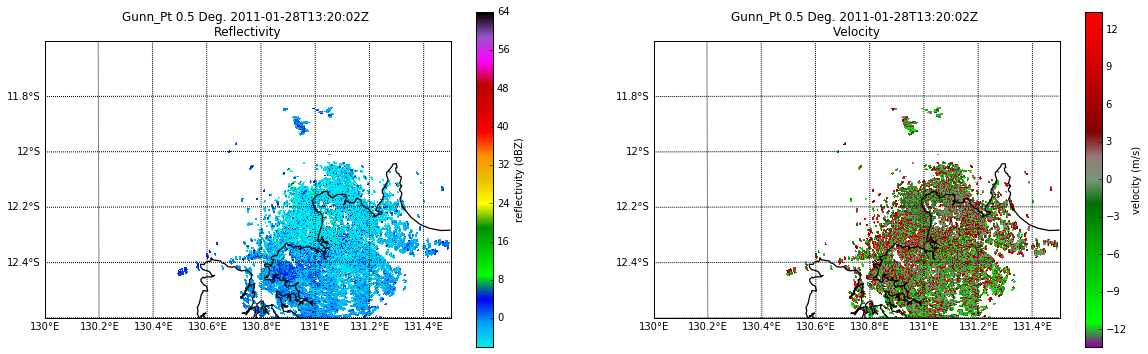

In [47]:
nyq = cpol_new.instrument_parameters['nyquist_velocity']['data'][0]
max_lat = -11.6
min_lat =-12.6
min_lon = 130
max_lon = 131.5

lat_lines = np.arange(min_lat, max_lat,.2)
lon_lines = np.arange(min_lon, max_lon, .2)

my_display = pyart.graph.RadarMapDisplay(cpol_new)
tilt = 0
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('reflectivity', tilt, vmin=-6, vmax=64.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.NWSRef)

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('velocity', tilt, vmin=-nyq, vmax=nyq, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.NWSVel)


(0, 160)

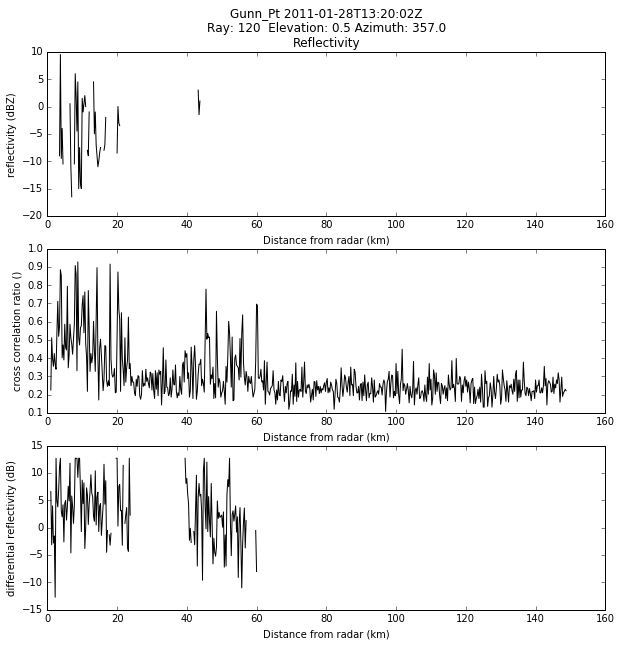

In [59]:
f = plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
my_display.plot_ray('reflectivity', 120)
plt.xlim([0,160])
plt.subplot(3,1,2)
my_display.plot_ray('cross_correlation_ratio', 120, title = '')
plt.xlim([0,160])

plt.subplot(3,1,3)
my_display.plot_ray('differential_reflectivity', 120, title = '')
plt.xlim([0,160])

#plt.subplots_adjust()

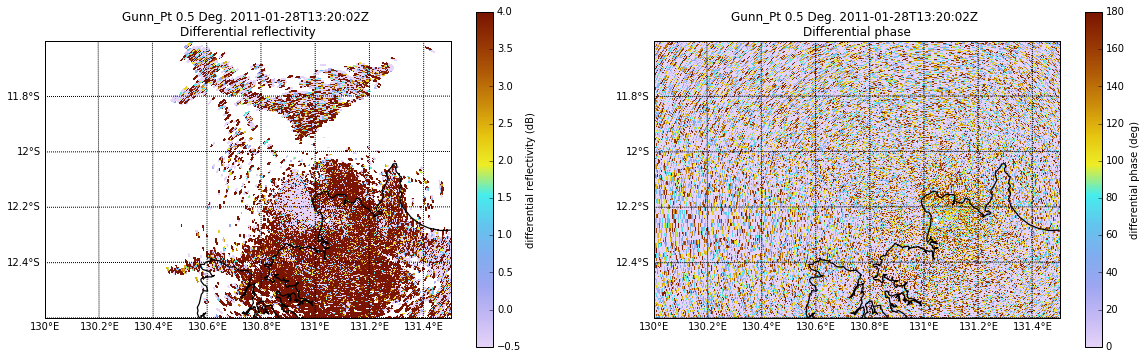

In [17]:
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('differential_reflectivity', tilt, 
                        vmin=-0.5, vmax=4.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.LangRainbow12)

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('differential_phase', tilt, 
                        vmin=0, vmax=180, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, 
                        max_lon = max_lon,
                       cmap = pyart.graph.cm.LangRainbow12)


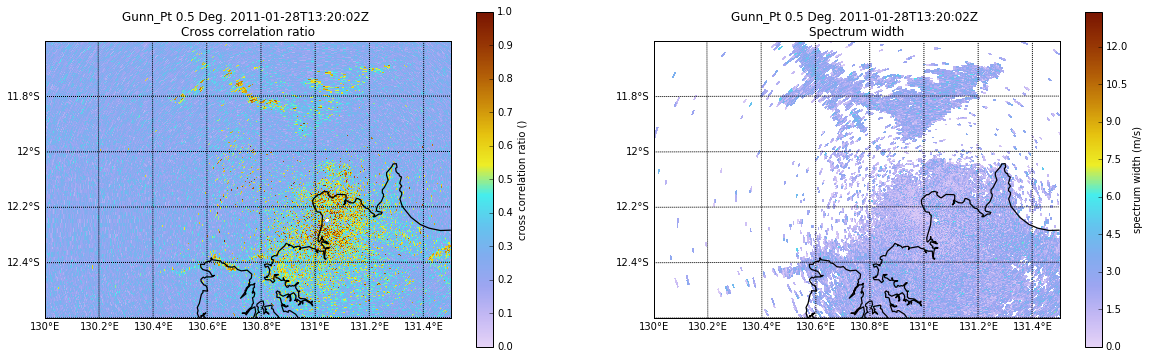

In [18]:
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('cross_correlation_ratio', tilt, 
                        vmin=0.0, vmax=1.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.LangRainbow12)

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('spectrum_width', tilt, 
                        vmin=0, vmax=nyq, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, 
                        max_lon = max_lon,
                       cmap = pyart.graph.cm.LangRainbow12)


In [19]:
print(len(cpol_new.sweep_end_ray_index['data']))
print(cpol_new.fixed_angle['data'])

15
[  0.5          0.89999998   1.29999995   1.79999995   2.4000001
   3.0999999    4.19999981   5.5999999    7.4000001   10.          13.30000019
  17.89999962  23.89999962  32.          43.09999847]


Ok.. now the operational radar

In [20]:
berr = pyart.aux_io.read_radx(berrimah_rapic_file, radx_dir = rad_dir)

In [21]:
print(berr.fields.keys())
print(berr.metadata)
print(berr.instrument_parameters.keys())

dict_keys(['Refl', 'Vel'])
{'original_format': 'RAPIC', 'time_coverage_end': '2010-01-31T18:45:30Z', 'time_coverage_start': '2010-01-31T18:40:03Z', 'title': 'RAPIC VOLUME FROM AUSTRALIA BUREAU OF METEOROLOGY', 'platform_type': "b'fixed'", 'history': 'Rapic RAW file: ', 'n_gates_vary': 'false', 'volume_number': 1, 'scan_name': 'UNKNOWN', 'primary_axis': "b'axis_z'", 'end_datetime': '2010-01-31T18:45:30Z', 'site_name': '63', 'scan_id': 0, 'Sub_conventions': 'CF-Radial instrument_parameters radar_parameters', 'Conventions': 'CF-1.6', 'instrument_name': 'Berrima', 'version': 'CF-Radial-1.3', 'platform_is_mobile': 'false', 'author': '', 'ray_times_increase': 'true', 'source': 'BOM RAPIC system', 'references': 'Conversion software: Radx::RapicRadxFile', 'comment': '', 'driver': 'RadxConvert(NCAR)', 'institution': '', 'created': '2016/10/26 16:44:24.297', 'instrument_type': "b'radar'", 'start_datetime': '2010-01-31T18:40:03Z'}
dict_keys(['prt', 'radar_antenna_gain_h', 'n_samples', 'follow_mod

In [22]:
transfer = {'Vel' : 'velocity',
            'Refl' : 'reflectivity'}
for key in transfer.keys():
    berr.fields[transfer[key]] = berr.fields.pop(key)

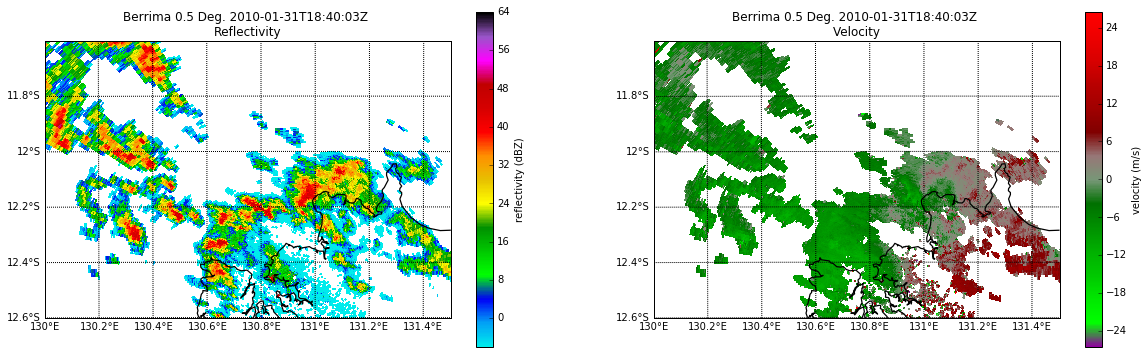

In [23]:
nyq = berr.instrument_parameters['nyquist_velocity']['data'][0]
max_lat = -11.6
min_lat =-12.6
min_lon = 130
max_lon = 131.5

lat_lines = np.arange(min_lat, max_lat,.2)
lon_lines = np.arange(min_lon, max_lon, .2)

my_display = pyart.graph.RadarMapDisplay(berr)
tilt = 0
f = plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
my_display.plot_ppi_map('reflectivity', tilt, vmin=-6, vmax=64.0, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.NWSRef)

ax = plt.gca()
plt.subplot(1,2,2)
my_display.plot_ppi_map('velocity', tilt, vmin=-nyq, vmax=nyq, 
                        lat_lines = lat_lines, lon_lines = lon_lines,
                        max_lat = max_lat, min_lat = min_lat, 
                        min_lon = min_lon, max_lon = max_lon,
                       cmap = pyart.graph.cm.NWSVel)


In [24]:
print(len(berr.sweep_end_ray_index['data']))
print(berr.fixed_angle['data'])

15
[  0.5          0.89999998   1.29999995   1.79999995   2.4000001
   3.0999999    4.19999981   5.5999999    7.4000001   10.          13.30000019
  17.89999962  23.89999962  32.          43.09999847]
